# Importing necessary libraries

In [72]:
import numpy as np 
import pandas as pd 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [5]:
data = pd.read_csv ("/home/patel/Desktop/CognoRise_InfoTech/news.csv")

In [6]:
data.info

<bound method DataFrame.info of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fell

In [7]:
data.head

<bound method NDFrame.head of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello.

In [8]:
data.shape

(6335, 4)

In [9]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [14]:
data.label.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [12]:
data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [13]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

# Data Preprocessing

In [15]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [19]:
data.duplicated

<bound method DataFrame.duplicated of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalis

In [21]:
labels = data.label
labels.head(100)

0     FAKE
1     FAKE
2     REAL
3     FAKE
4     REAL
      ... 
95    FAKE
96    FAKE
97    REAL
98    REAL
99    REAL
Name: label, Length: 100, dtype: object

In [22]:
data.reset_index(inplace=True)

In [23]:
data

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...,...
6330,6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Plotting Data

<Axes: xlabel='count', ylabel='label'>

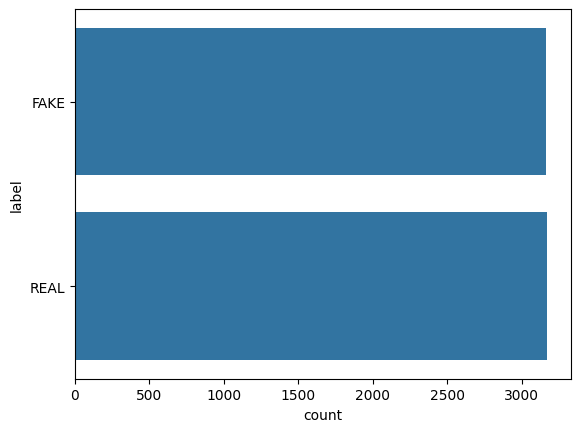

In [30]:
sns.countplot(data["label"])

In [31]:
dataset = data["title"][120]
dataset

"Obama's terror strategy is failing: US must heed lessons of 9/11"

In [35]:
list = dataset.split()
list

["Obama's",
 'terror',
 'strategy',
 'is',
 'failing:',
 'US',
 'must',
 'heed',
 'lessons',
 'of',
 '9/11']

In [68]:
print(type(data))

<class 'str'>


In [62]:
print("Type of dataset variable:", type(dataset))
print("Value of dataset:", dataset)

Type of dataset variable: <class 'str'>
Value of dataset: Obama's terror strategy is failing: US must heed lessons of 9/11


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont

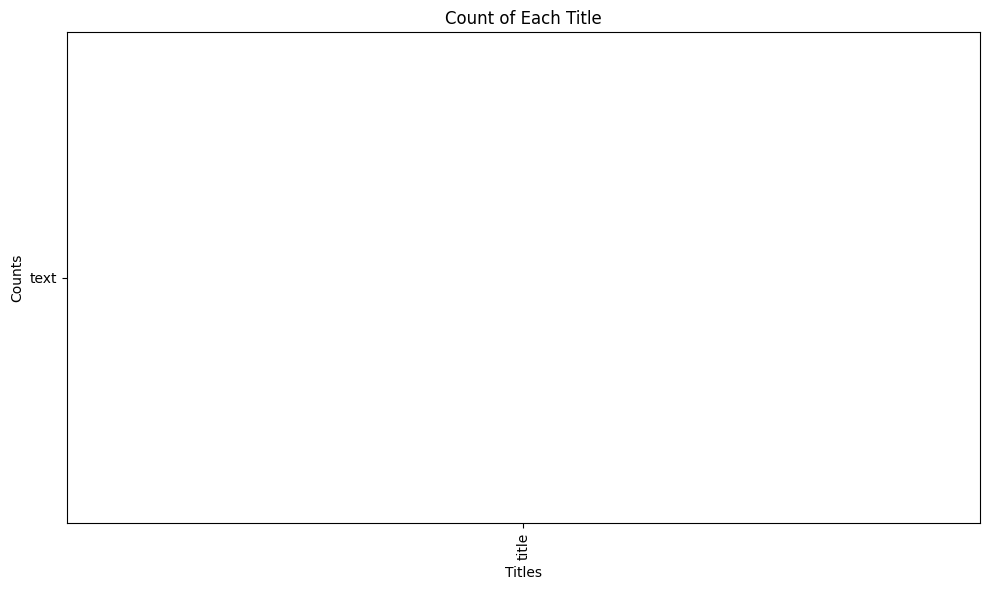

In [100]:
plt.figure(figsize=(10, 6))
plt.bar('title', 'text', color='skyblue')
plt.xlabel('Titles')
plt.ylabel('Counts')
plt.title('Count of Each Title')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

# Line Plot

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont

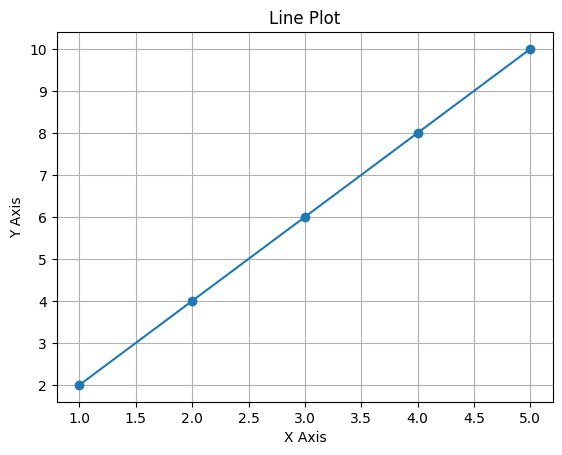

In [101]:
x_data = [1, 2, 3, 4, 5]
y_data = [2, 4, 6, 8, 10]
plt.plot(x_data, y_data, marker='o', linestyle='-')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.grid(True)  
plt.show()

# Scatter PLot

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont

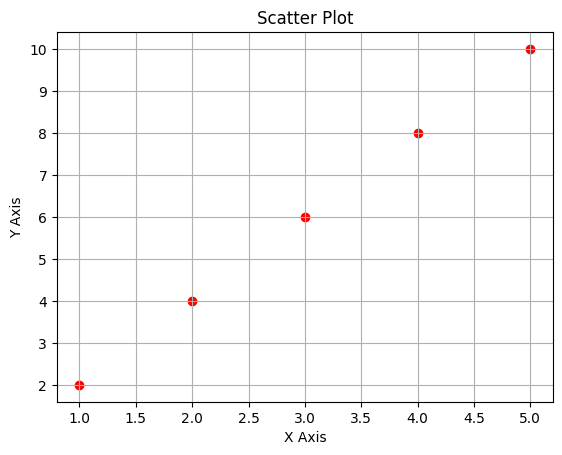

In [102]:
x_data = [1, 2, 3, 4, 5]
y_data = [2, 4, 6, 8, 10]
plt.scatter(x_data, y_data, color='red', marker='o')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot')
plt.grid(True)  
plt.show()

# Histogram

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont

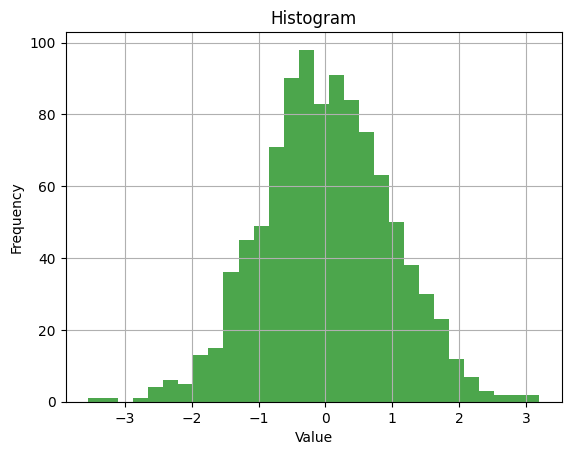

In [103]:
data = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(data, bins=30, color='green', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True) 
plt.show()

# Pie Chart

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica, Tahoma
findfont

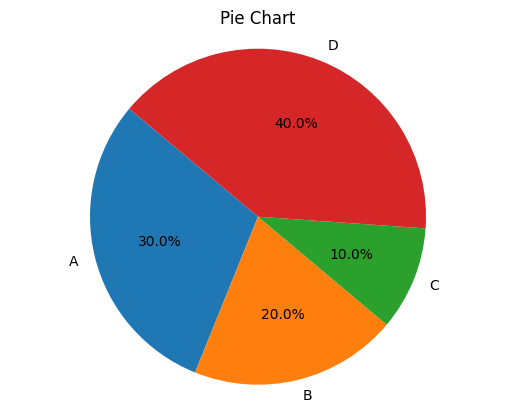

In [104]:
sizes = [30, 20, 10, 40]
plt.pie(sizes, labels=['A', 'B', 'C', 'D'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.axis('equal')  
plt.show()